In [24]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [36]:
def constant_i(starting_time,amper,finish_time,time_delta):
    length = int(finish_time / time_delta)
    i_data = []
    for i in range(length):
        if i*time_delta >= starting_time:
            i_data.append(amper)
        else:
            i_data.append(0)
    return i_data

def fichart(max_i,resistance,capacity):
    fii = []
    for i in range (max_i):
        fii.append(spike(0,i,resistance,capacity,False))
    return fii
         
def spike(starting_time,amper,resistance,capacity,flag=True):

    tau = resistance * capacity

    time = 0
    time_delta = 0.001

    u_rest = -70
    threshold = -55

    u_data = []
    u_t = u_rest

    finish_time = 200

    spike_times = [starting_time]
    
    i_data = constant_i(starting_time,amper,finish_time,time_delta)
    i_index = 0
    
    f = 0
    
    tt = 0

    while (tt + time_delta < finish_time) :

        i_t = i_data[i_index]
        
        u_t_plus_theta = u_t - (time_delta/tau) * ((u_t - u_rest) - resistance * i_t)

        time += time_delta
        if u_t_plus_theta >= threshold:
            spike_times.append(tt)
            time = starting_time
            u_t_plus_theta = u_rest
        
        if len(spike_times) == 2:
            T = abs(spike_times[1] - spike_times[0])
            f = 1/T
            

        u_data.append(u_t_plus_theta)
        u_t = u_data[-1]
        
        i_index += 1
        tt += time_delta
        
    if flag == True:
        point1 = [0,threshold]
        point2 = [finish_time,threshold]
        x_values1 = [point1[0], point2[0]]
        y_values1 = [point1[1], point2[1]]

        point5 = [0,u_rest]
        point6 = [finish_time,u_rest]
        x_values3 = [point5[0], point6[0]]
        y_values3 = [point5[1], point6[1]]

        fig = plt.figure(constrained_layout=True)
        gs = fig.add_gridspec(5, 5)
        axs0 = fig.add_subplot(gs[:3, :])
        axs1 = fig.add_subplot(gs[3, :])
        fig.set_figwidth(10)
        fig.set_figheight(8)
        axs0.plot([int(i*time_delta) for i in np.arange(len(u_data))],u_data)
        axs0.plot(x_values1,y_values1,'r--',label='Threshold')
        axs0.plot(x_values3,y_values3,'k--',label='U_Rest')
        axs0.set_ylim(-75,-50)
        axs0.set_ylabel('U')
        leg1 = axs0.legend()
        axs0.set_yticks(np.arange(-75,-50,5))
        custom_lines = [Line2D([0], [0],color='w', lw=1),
            Line2D([0], [0],color='w', lw=1),
            Line2D([0], [0],color='w', lw=1)]
        a = 'I = ' + str(amper)
        b = 'R = ' + str(resistance)
        c = 'C = ' + str(capacity)
        axs0.legend(custom_lines,[a,b,c],loc='upper left')
        axs0.add_artist(leg1)
        axs1.plot([int(i*time_delta) for i in np.arange(len(i_data))],i_data)
        axs1.set_ylim(min(i_data)-1,max(i_data)+1)
        axs1.set_ylabel('I')
        axs1.set_xlabel('Time')
        fii = fichart(amper * 2,resistance,capacity)
        axs2 = fig.add_subplot(gs[4:,:])
        axs2.plot(np.arange(len(fii)),fii)
        axs2.set_ylabel('F')
        axs2.set_xlabel('I')
        
    if flag == False:
        return f
    
    return fii
        
    
    




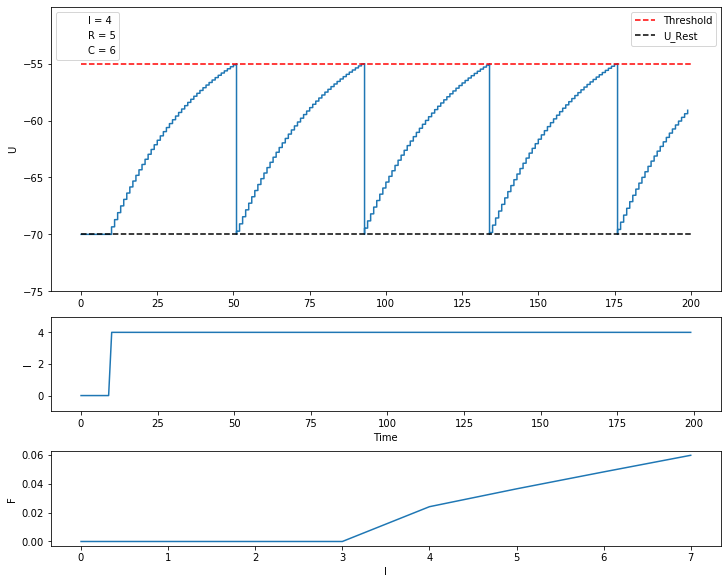

In [37]:
fii = spike(starting_time = 10,amper = 4,resistance = 5,capacity = 6,flag=True)

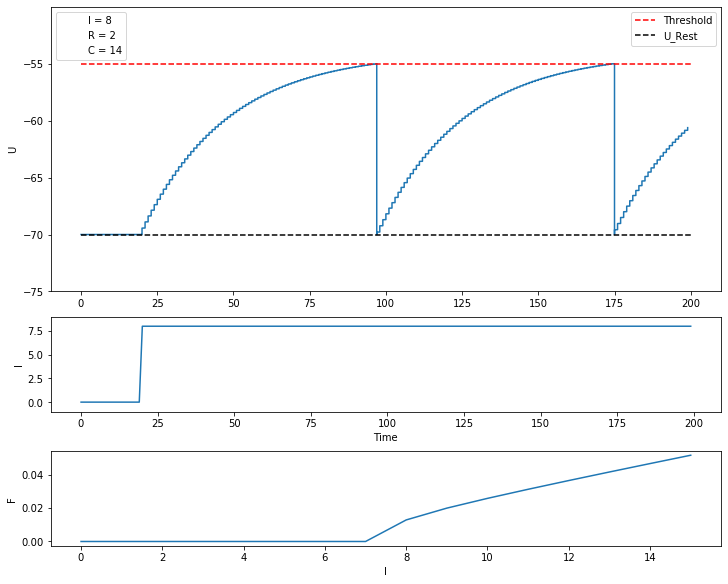

In [38]:
fii = spike(starting_time = 20,amper = 8,resistance = 2,capacity = 14,flag=True)

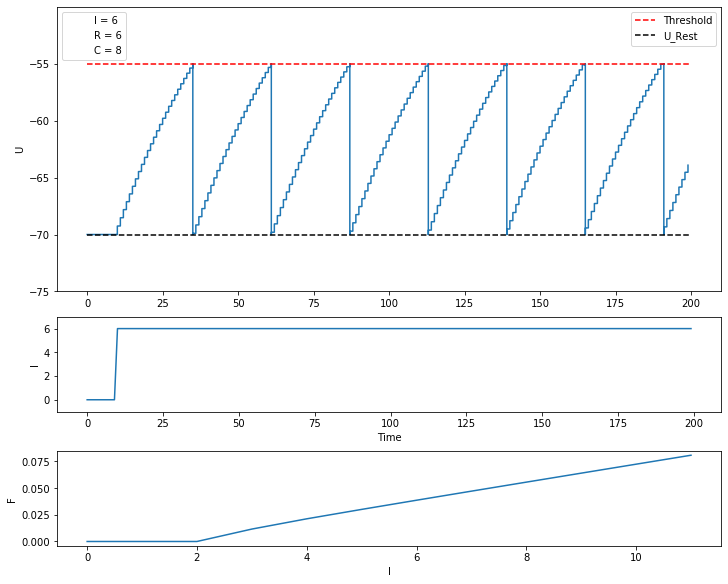

In [39]:
fii = spike(starting_time = 10,amper = 6,resistance = 6,capacity = 8,flag=True)

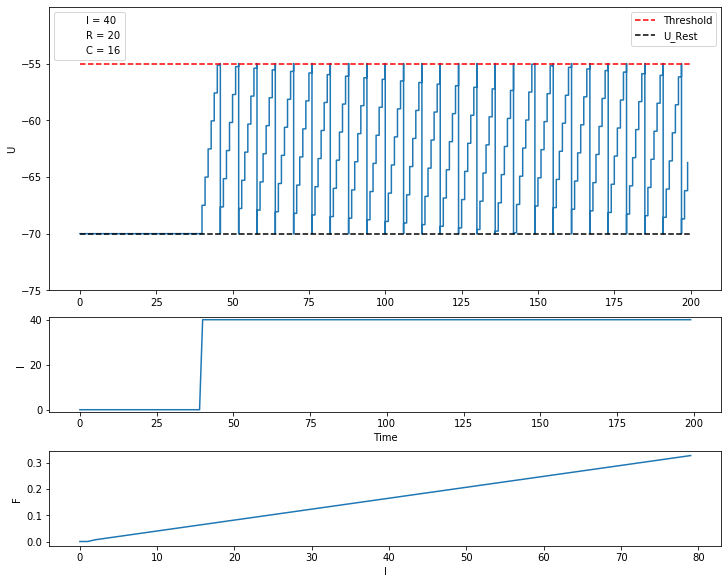

In [40]:
fii = spike(starting_time = 40,amper = 40,resistance = 20,capacity = 16,flag=True)

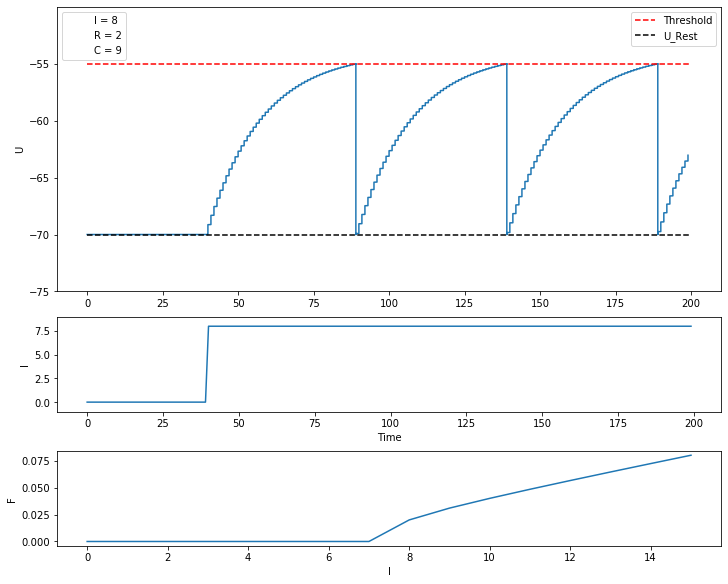

In [41]:
fii = spike(starting_time = 40,amper = 8,resistance = 2,capacity = 9,flag=True)